#**Questão 1**

##**Imports necessários para rodar o código**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

##**Pré-Processamento** :

Para obter bons resultados, o passo mais importante é o pré-processamento, pois além do processo de preparação, organização e estruturação dos dados, é também um momento ideal para escolher quais dados incorporar de forma significativa em nosso conjunto de dados. Já que a qualidade dos dados influência significamente no resultado do modelo.

###Inicializando a base: 

Primeiro a base é inicializada, depois foi feito um drop da primeira coluna que continha informações irrelvantes (os ids das instâncias), após isso foi feito um array numpy com os dados para ser utilizado posteriomente na plotagem do gráfico com a base sem a normalização.

In [ ]:
data_set = pd.read_csv("https://raw.githubusercontent.com/Thiag0Andres/ListaII-IA/master/hcvdat0.csv", sep = ',').drop(['Unnamed: 0'], axis=1)
data_set

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


###Valores Nulos: 

Verificando se existem valores nulos. Percebe-se que que existem alguns valores nulos, depois disso fazemos a remoção desses valores.

In [ ]:
pd.isnull(data_set).sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [ ]:
data_set = data_set.dropna(axis = 0)
pd.isnull(data_set).sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

###Modificação das Instâncias

As instâncias correspondentes ao 0s=suspect Blood Donor foram atribuidos em uma nova variável para utilizarmos na validação. Além disso, foi adicionado 0 para Não doador e 1 para doador nas instâncias 1=Hepatitis, 2=Fibrosis e 3=Cirrhosis como: Não doador e 0=Blood Donor como: Doador. 

In [ ]:
data_set_suspect = data_set
data_set_suspect = data_set[data_set['Category'] == '0s=suspect Blood Donor']
data_set = data_set[data_set['Category'] != '0s=suspect Blood Donor']
data_set_suspect

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
533,0s=suspect Blood Donor,47,m,22.5,124.0,79.5,46.7,2.3,6.83,4.30,170.0,345.6,58.6
534,0s=suspect Blood Donor,48,m,24.9,116.9,49.2,24.3,4.9,3.44,5.25,29.0,83.0,47.8
535,0s=suspect Blood Donor,49,m,21.6,42.2,9.5,10.6,2.4,3.75,3.01,64.0,38.9,44.8
536,0s=suspect Blood Donor,55,m,47.3,106.0,208.8,130.6,0.8,14.80,8.08,76.0,71.6,78.3
537,0s=suspect Blood Donor,71,m,14.9,69.8,19.7,95.2,9.8,13.30,2.61,9.0,7.6,47.0
538,0s=suspect Blood Donor,74,m,20.3,84.0,22.8,43.0,5.7,4.91,3.19,52.0,218.3,47.8
539,0s=suspect Blood Donor,59,f,19.3,208.2,325.3,146.6,6.9,5.33,4.72,32.0,295.6,53.1


###Modificação dos Atributos

Atributos correspondentes ao Category e Sex foram modificados para serem numéricos.


In [ ]:
numberCatSex = LabelEncoder()
data_set['Category'] = numberCatSex.fit_transform(data_set['Category'] == '0=Blood Donor')
data_set['Sex'] = numberCatSex.fit_transform(data_set['Sex'])
data_set

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,1,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,1,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,1,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,0,58,0,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,0,59,0,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,0,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,0,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


###Balanciamento da Base

Após fazer as transformações para 0 e 1 dos atributos e das instâncias foi verificado que a base teve um grande desbalanceamento para a classe do doador, com isso foi necessário a redução das instâncias até que a base esteja balanceada para o treinamento. Foram retiradas as 470 primeiras instâncias da classe doador.

In [ ]:
data_set.groupby('Category').count()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Category,,,,,,,,,,,,
0,56,56,56,56,56,56,56,56,56,56,56,56
1,526,526,526,526,526,526,526,526,526,526,526,526


In [ ]:
data_set.drop(data_set.head(470).index, inplace = True) 
data_set

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
476,1,53,0,43.7,84.3,18.8,18.6,8.5,10.22,6.65,56.0,16.5,76.9
477,1,53,0,43.5,61.7,16.9,20.3,7.0,7.19,6.97,74.0,12.3,69.2
478,1,53,0,41.1,91.7,13.8,19.6,3.4,7.87,5.48,72.0,77.3,77.3
479,1,53,0,38.0,84.7,23.5,19.8,10.8,7.30,4.82,62.0,11.4,68.5
480,1,53,0,47.4,66.9,24.3,32.6,14.9,10.51,6.03,81.0,25.2,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,0,58,0,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,0,59,0,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,0,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,0,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


In [ ]:
data_set.groupby('Category').count()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Category,,,,,,,,,,,,
0,56,56,56,56,56,56,56,56,56,56,56,56
1,56,56,56,56,56,56,56,56,56,56,56,56


###Correlação:

Se faz necessário a verificação de uma correlação entre os atributos, foi encontrado dois atributos com uma alta correlação:
* Flavanoids;
* Total_phenols.

In [ ]:
correlation = data_set.corr()
correlation.style.background_gradient(cmap="rainbow").set_precision(3)

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Category,1.000,0.483,-0.745,0.121,0.118,0.283,-0.571,-0.389,0.302,0.509,-0.187,-0.426,-0.167
Age,0.483,1.000,-0.470,-0.246,0.284,-0.094,-0.186,-0.071,-0.147,0.144,-0.127,-0.032,-0.156
Sex,-0.745,-0.470,1.000,-0.059,-0.210,-0.147,0.491,0.323,-0.193,-0.408,0.155,0.332,-0.033
ALB,0.121,-0.246,-0.059,1.000,-0.293,0.383,-0.185,-0.378,0.655,0.369,-0.100,-0.062,0.551
ALP,0.118,0.284,-0.210,-0.293,1.000,-0.101,0.019,0.101,-0.182,0.098,0.215,0.542,-0.180
ALT,0.283,-0.094,-0.147,0.383,-0.101,1.000,0.172,-0.289,0.268,0.194,-0.205,-0.040,0.153
AST,-0.571,-0.186,0.491,-0.185,0.019,0.172,1.000,0.258,-0.381,-0.428,-0.055,0.454,0.115
BIL,-0.389,-0.071,0.323,-0.378,0.101,-0.289,0.258,1.000,-0.542,-0.285,-0.010,0.202,-0.133
CHE,0.302,-0.147,-0.193,0.655,-0.182,0.268,-0.381,-0.542,1.000,0.534,-0.087,-0.219,0.258
CHOL,0.509,0.144,-0.408,0.369,0.098,0.194,-0.428,-0.285,0.534,1.000,-0.130,-0.130,0.202


###Outiliers:

Outliers são dados que basicamente mantêm distância de todos os outros pontos. São pontos fora do normal, cujos valores estão fora da faixa normal e podem causar resultados desequilibrados. O conjunto de dados pode conter um ou mais outliers. A influência dos outliers é quase um efeito borboleta, pequenos erros se espalharão, se não forem tratados corretamente, causarão problemas e anormalidades. Na análise estatística, a influência de outliers é fácil de observar. Foi verificado que existem várias ocorrências de outliers.

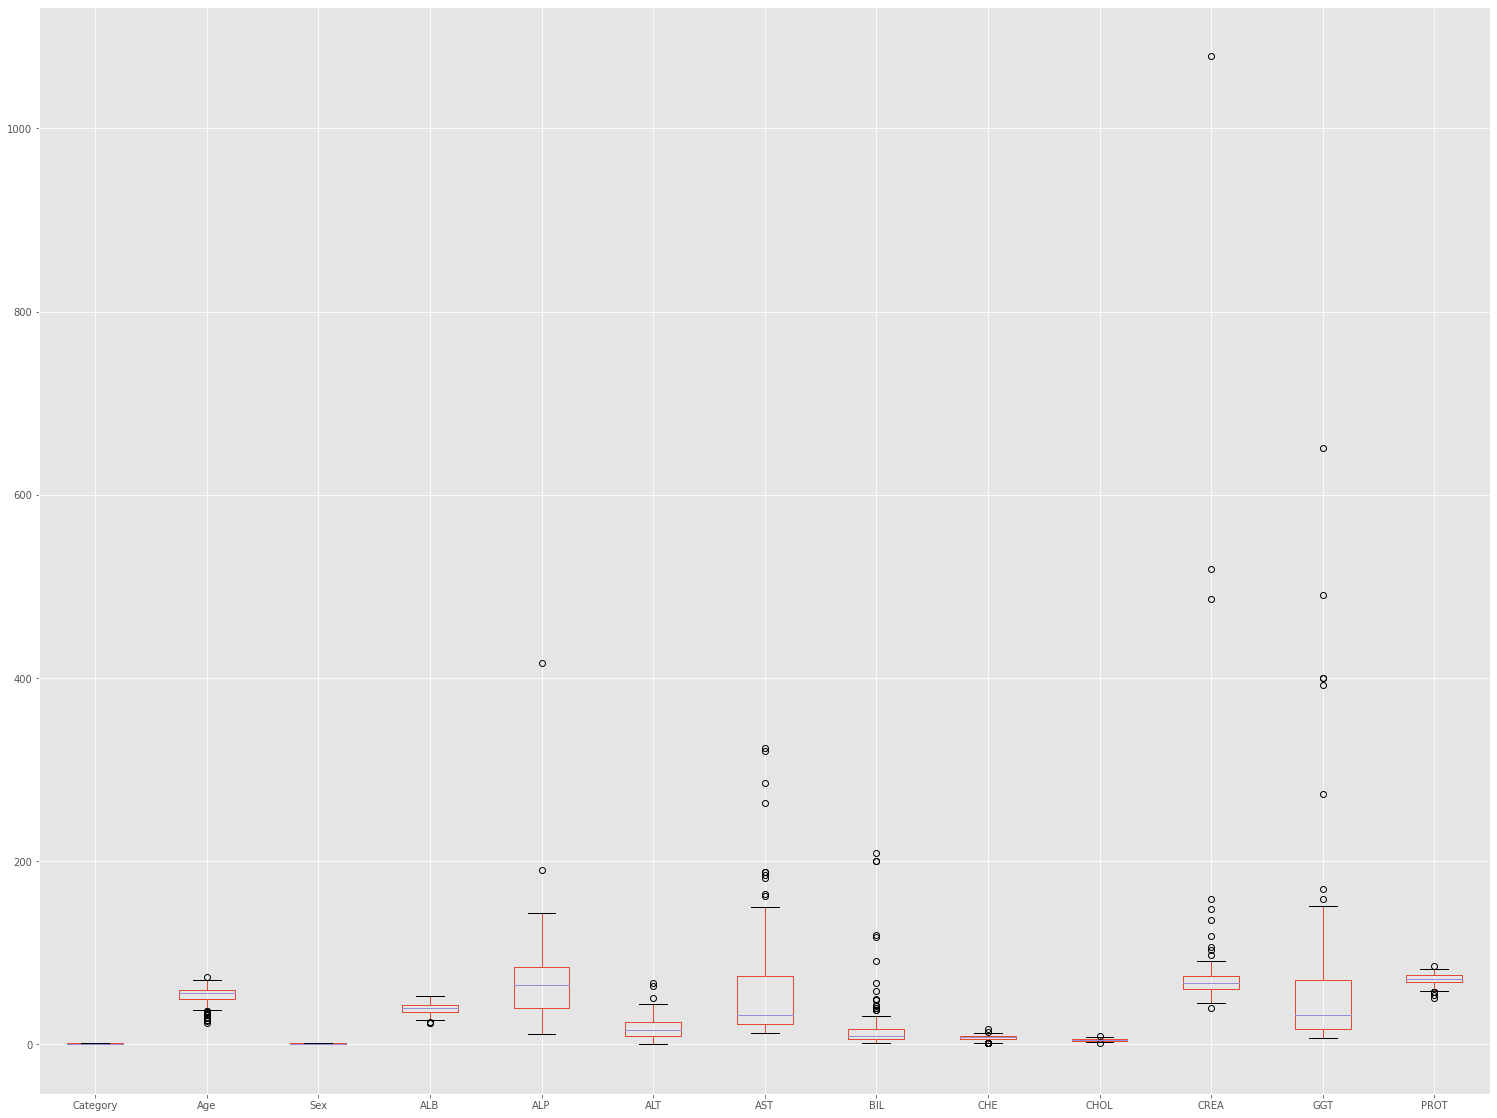

In [ ]:
data_set.boxplot(figsize=(26,20))

###Normalização da Base

Para a normalização da base foi escolhido o StandardScaler.

In [ ]:
columns_mean = data_set.mean()
columns_std = data_set.std()
data_set_normalized = (data_set - columns_mean) / columns_std
data_set_normalized

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
476,0.995526,-0.024927,-0.742021,0.700943,0.370545,0.019606,-0.671367,-0.337712,0.980632,1.064056,-0.275652,-0.505290,0.898905
477,0.995526,-0.024927,-0.742021,0.669447,-0.143386,-0.130474,-0.644564,-0.379065,-0.084799,1.302464,-0.115045,-0.547233,-0.302980
478,0.995526,-0.024927,-0.742021,0.291486,0.538823,-0.375343,-0.655601,-0.478311,0.154308,0.192376,-0.132891,0.101889,0.961340
479,0.995526,-0.024927,-0.742021,-0.196714,0.379641,0.390859,-0.652447,-0.274305,-0.046120,-0.299340,-0.222116,-0.556221,-0.412242
480,0.995526,-0.024927,-0.742021,1.283634,-0.025136,0.454050,-0.450633,-0.161275,1.082604,0.602140,-0.052587,-0.418407,0.602336
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,-0.995526,0.473615,-0.742021,-0.826649,-0.491312,-0.280555,1.400382,-0.351497,-0.411812,-0.925162,-0.275652,-0.173738,1.476434
609,-0.995526,0.573324,-0.742021,-0.039230,-0.379885,0.082798,3.541504,0.530691,-0.584109,-0.530298,0.439046,0.339567,-0.100064
610,-0.995526,0.872449,-0.742021,-1.141617,7.927146,-0.999362,0.774442,0.806375,-0.654435,0.803297,-0.278329,5.830138,-0.412242
611,-0.995526,1.071866,-0.742021,-2.401487,0.791241,-1.236332,-0.264586,-0.020676,-2.071492,-1.640386,-0.213194,-0.311552,0.024807


In [ ]:
data_set_normalized['Category'] = numberCatSex.fit_transform(data_set_normalized['Category'])
data_set_normalized

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
476,1,-0.024927,-0.742021,0.700943,0.370545,0.019606,-0.671367,-0.337712,0.980632,1.064056,-0.275652,-0.505290,0.898905
477,1,-0.024927,-0.742021,0.669447,-0.143386,-0.130474,-0.644564,-0.379065,-0.084799,1.302464,-0.115045,-0.547233,-0.302980
478,1,-0.024927,-0.742021,0.291486,0.538823,-0.375343,-0.655601,-0.478311,0.154308,0.192376,-0.132891,0.101889,0.961340
479,1,-0.024927,-0.742021,-0.196714,0.379641,0.390859,-0.652447,-0.274305,-0.046120,-0.299340,-0.222116,-0.556221,-0.412242
480,1,-0.024927,-0.742021,1.283634,-0.025136,0.454050,-0.450633,-0.161275,1.082604,0.602140,-0.052587,-0.418407,0.602336
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,0,0.473615,-0.742021,-0.826649,-0.491312,-0.280555,1.400382,-0.351497,-0.411812,-0.925162,-0.275652,-0.173738,1.476434
609,0,0.573324,-0.742021,-0.039230,-0.379885,0.082798,3.541504,0.530691,-0.584109,-0.530298,0.439046,0.339567,-0.100064
610,0,0.872449,-0.742021,-1.141617,7.927146,-0.999362,0.774442,0.806375,-0.654435,0.803297,-0.278329,5.830138,-0.412242
611,0,1.071866,-0.742021,-2.401487,0.791241,-1.236332,-0.264586,-0.020676,-2.071492,-1.640386,-0.213194,-0.311552,0.024807


##**Multilayer Perceptron**

A perceptron multicamadas é uma rede neural semelhante à perceptron, mas com mais de uma camada de neurônios em alimentação direta. Tal tipo de rede é composta por camadas de neurônios ligadas entre si por sinapses com pesos. 

###Criação de váriaveis

Atributos de previsões e a classe.

In [ ]:
predictions = data_set.iloc[:, 1:14]
Class = data_set.iloc[:, 0]

###Divisão de Treino e Teste

Foi dividido 80% para o treinamento e 20% para o teste da Rede Neural.

In [ ]:
predictions_train, predictions_test, class_train, class_test = train_test_split(predictions, Class,
                                                                                              random_state = 0, test_size = 0.20)

###Criação da Rede Neural

In [ ]:
model = Sequential()
model.add(Dense(units = 8, activation = 'relu', kernel_initializer = 'random_uniform', input_dim = 12))
model.add(Dense(units = 8, activation = 'relu', kernel_initializer = 'random_uniform'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

###Treino da Rede

In [ ]:
model.fit(predictions_train, class_train, batch_size = 5, epochs = 15)

Epoch 1/15
18/18 [==============================] - 0s 1ms/step - loss: 0.6526 - binary_accuracy: 0.6966
Epoch 2/15
18/18 [==============================] - 0s 1ms/step - loss: 0.5723 - binary_accuracy: 0.9438
Epoch 3/15
18/18 [==============================] - 0s 1ms/step - loss: 0.5035 - binary_accuracy: 0.9438
Epoch 4/15
18/18 [==============================] - 0s 2ms/step - loss: 0.4318 - binary_accuracy: 0.9326
Epoch 5/15
18/18 [==============================] - 0s 1ms/step - loss: 0.3572 - binary_accuracy: 0.9326
Epoch 6/15
18/18 [==============================] - 0s 1ms/step - loss: 0.2840 - binary_accuracy: 0.9438
Epoch 7/15
18/18 [==============================] - 0s 1ms/step - loss: 0.2230 - binary_accuracy: 0.9438
Epoch 8/15
18/18 [==============================] - 0s 1ms/step - loss: 0.1827 - binary_accuracy: 0.9663
Epoch 9/15
18/18 [==============================] - 0s 2ms/step - loss: 0.1522 - binary_accuracy: 0.9551
Epoch 10/15
18/18 [==============================] - 0s

###Predição

In [ ]:
prediction = model.predict(predictions_test)
prediction = (prediction > 0.5)
prediction

array([[ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False]])

###Validção do treinamento

In [ ]:
result = model.evaluate(predictions_test, class_test)

1/1 [==============================] - 0s 1ms/step - loss: 0.0972 - binary_accuracy: 0.9565


###Matriz de Confusão

A matriz de confusão deu os seguintes cenários: 12 instâncias não doaodor -> O Modelo classificou 11 corretas e 1 como doador | 11 instâncias doador -> O Modelo classficou 11 corretas.

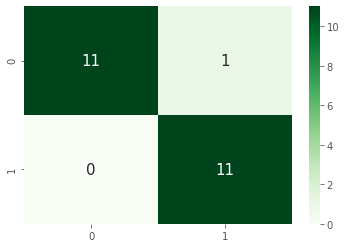

In [ ]:
matriz = confusion_matrix(class_test, prediction)

df = pd.DataFrame(matriz, range(2), range(2))
sn.heatmap(df, annot=True, annot_kws={"size": 15}, cmap="Greens")


###Classificar as 7 instâncias


Classificando as 7 instâncias de 0s=suspect Blood Donor

In [ ]:
data_set_suspect['Sex'] = numberCatSex.fit_transform(data_set_suspect['Sex'])
data_set_suspect

predictions_suspect = data_set_suspect.iloc[:, 1:14]
predictions_suspect
prediction_suspect = model.predict(predictions_suspect)
prediction_suspect = (predictions_suspect > 0.5)
prediction_suspect

array([[False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True]])

Classificou as 7 instâncias como 3 _doadores_ e 4 _não doadores_

##**Random Forest**

Florestas de decisão aleatória são um método de aprendizagem de conjunto para classificação, regressão e outras tarefas que operam construindo uma infinidade de árvores de decisão no momento do treinamento e gerando a classe que é o modo das classes (classificação) ou predição média / média ( regressão) das árvores individuais.

###Criação de váriaveis

Atributos de previsões e a classe.

In [ ]:
predictions = data_set.iloc[:, 1:14]
Class = data_set.iloc[:, 0]

###Divisão de Treino e Teste

Foi dividido 80% para o treinamento e 20% para o teste da Rede Neural.

In [ ]:
predictions_train, predictions_test, class_train, class_test = train_test_split(predictions, Class,
                                                                                              random_state = 0, test_size = 0.20)

###Classificador

In [ ]:
classifier = RandomForestClassifier(n_estimators = 30,
                                    criterion = 'entropy', random_state = 0)

###Treinamento do Classificador

In [ ]:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

###Predição do Classificador

In [ ]:
prediction = model.predict(predictions_test)
prediction = (prediction > 0.5)
prediction

array([[ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False]])

In [ ]:
precision = round(accuracy_score(class_test, prediction), 2)
print('Acurácia:', precision)

Acurácia: 0.96


###Matriz de Confusão

A matriz de confusão deu os seguintes cenários: 11 instâncias não doaodor -> O Modelo classificou 11 corretas | 12 instâncias doador -> O Modelo classficou 11 corretas e 1 incorreta.

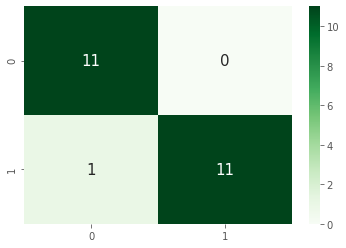

In [ ]:
matriz = confusion_matrix(prediction, class_test)

df = pd.DataFrame(matriz, range(2), range(2))
sn.heatmap(df, annot=True, annot_kws={"size": 15}, cmap="Greens")


###Classificar as 7 instâncias


Classificando as 7 instâncias de 0s=suspect Blood Donor

In [ ]:
data_set_suspect


,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
533,0s=suspect Blood Donor,47,m,22.5,124.0,79.5,46.7,2.3,6.83,4.30,170.0,345.6,58.6
534,0s=suspect Blood Donor,48,m,24.9,116.9,49.2,24.3,4.9,3.44,5.25,29.0,83.0,47.8
535,0s=suspect Blood Donor,49,m,21.6,42.2,9.5,10.6,2.4,3.75,3.01,64.0,38.9,44.8
536,0s=suspect Blood Donor,55,m,47.3,106.0,208.8,130.6,0.8,14.80,8.08,76.0,71.6,78.3
537,0s=suspect Blood Donor,71,m,14.9,69.8,19.7,95.2,9.8,13.30,2.61,9.0,7.6,47.0
538,0s=suspect Blood Donor,74,m,20.3,84.0,22.8,43.0,5.7,4.91,3.19,52.0,218.3,47.8
539,0s=suspect Blood Donor,59,f,19.3,208.2,325.3,146.6,6.9,5.33,4.72,32.0,295.6,53.1


In [ ]:
predictions_suspect = data_set_suspect.iloc[:, 1:14]
predictions_suspect

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
533,47,m,22.5,124.0,79.5,46.7,2.3,6.83,4.30,170.0,345.6,58.6
534,48,m,24.9,116.9,49.2,24.3,4.9,3.44,5.25,29.0,83.0,47.8
535,49,m,21.6,42.2,9.5,10.6,2.4,3.75,3.01,64.0,38.9,44.8
536,55,m,47.3,106.0,208.8,130.6,0.8,14.80,8.08,76.0,71.6,78.3
537,71,m,14.9,69.8,19.7,95.2,9.8,13.30,2.61,9.0,7.6,47.0
538,74,m,20.3,84.0,22.8,43.0,5.7,4.91,3.19,52.0,218.3,47.8
539,59,f,19.3,208.2,325.3,146.6,6.9,5.33,4.72,32.0,295.6,53.1


In [ ]:
prediction_suspect = classifier.predict(predictions_suspect)
prediction_suspect = (prediction_suspect > 0.5)
prediction_suspect

## começou a dar um problema e não tive tempo de corrigir

Classificou as 7 instâncias como 1 _doador_ e 6 _não doadores_


#**Questão 2**

##**Imports necessários para rodar o código**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score

##**Pré-Processamento** :

Para obter bons resultados, o passo mais importante é o pré-processamento, pois além do processo de preparação, organização e estruturação dos dados, é também um momento ideal para escolher quais dados incorporar de forma significativa em nosso conjunto de dados. Já que a qualidade dos dados influência significamente no resultado do modelo.

###Inicializando a base: 

Primeiro a base é inicializada, depois foi feito um drop da primeira coluna que continha informações irrelvantes (os ids das instâncias), após isso foi feito um array numpy com os dados para ser utilizado posteriomente na plotagem do gráfico com a base sem a normalização. 

In [ ]:
data_set = pd.read_csv("https://raw.githubusercontent.com/Thiag0Andres/ListaII-IA/master/wine.csv", sep = ',').drop(['Unnamed: 0'], axis=1)
data_set_not_normalized = np.array(data_set)
data_set.head() 

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


###Correlação:

Se faz necessário a verificação de uma correlação entre os atributos, foi encontrado dois atributos com uma alta correlação:
* Flavanoids;
* Total_phenols.


In [ ]:
correlation = data_set.corr()
correlation.style.background_gradient(cmap="rainbow").set_precision(3)

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
Alcohol,1.000,0.094,0.212,-0.310,0.271,0.289,0.237,-0.156,0.137,0.546,-0.072,0.072,0.644
Malic_acid,0.094,1.000,0.164,0.289,-0.055,-0.335,-0.411,0.293,-0.221,0.249,-0.561,-0.369,-0.192
Ash,0.212,0.164,1.000,0.443,0.287,0.129,0.115,0.186,0.010,0.259,-0.075,0.004,0.224
Alcalinity_of_ash,-0.310,0.289,0.443,1.000,-0.083,-0.321,-0.351,0.362,-0.197,0.019,-0.274,-0.277,-0.441
Magnesium,0.271,-0.055,0.287,-0.083,1.000,0.214,0.196,-0.256,0.236,0.200,0.055,0.066,0.393
Total_phenols,0.289,-0.335,0.129,-0.321,0.214,1.000,0.865,-0.450,0.612,-0.055,0.434,0.700,0.498
Flavanoids,0.237,-0.411,0.115,-0.351,0.196,0.865,1.000,-0.538,0.653,-0.172,0.543,0.787,0.494
Nonflavanoid_phenols,-0.156,0.293,0.186,0.362,-0.256,-0.450,-0.538,1.000,-0.366,0.139,-0.263,-0.503,-0.311
Proanthocyanins,0.137,-0.221,0.010,-0.197,0.236,0.612,0.653,-0.366,1.000,-0.025,0.296,0.519,0.330
Color_intensity,0.546,0.249,0.259,0.019,0.200,-0.055,-0.172,0.139,-0.025,1.000,-0.522,-0.429,0.316


###Outiliers:

Outliers são dados que basicamente mantêm distância de todos os outros pontos. São pontos fora do normal, cujos valores estão fora da faixa normal e podem causar resultados desequilibrados. O conjunto de dados pode conter um ou mais outliers. A influência dos outliers é quase um efeito borboleta, pequenos erros se espalharão, se não forem tratados corretamente, causarão problemas e anormalidades. Na análise estatística, a influência de outliers é fácil de observar. Foi verificado que o **Magnesium** tem mais ocorrências de outliers.

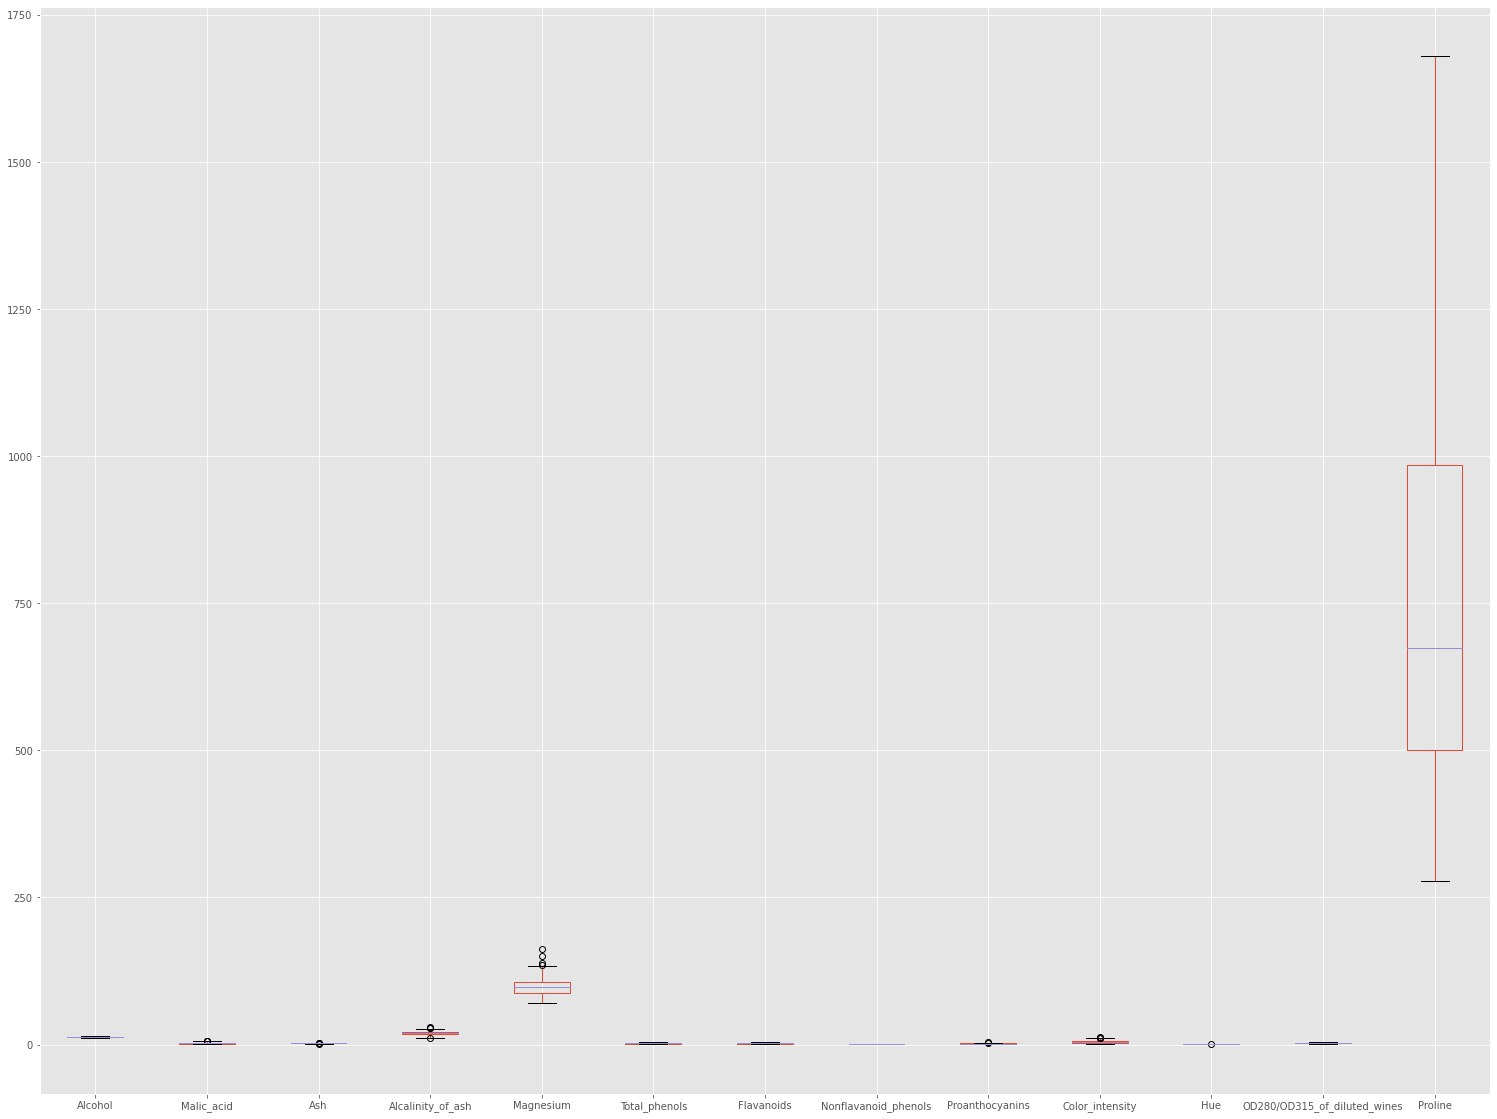

In [ ]:
data_set.boxplot(figsize=(26,20))

###Normalização da Base

Para a normalização da base foi escolhido o MinMaxScaler que é um método alternativo de escalonamento de dados. A diferença é que atua sobre colunas, o que irá gerar um novo escalonamento entre 0 e 1 ( Se houver um valor negativo no conjunto de dados, ele está entre -1 e 1). É importante que se a distribuição de dados for anormal e o desvio padrão for pequeno, essa técnica funcione melhor. Além disso, MinMaxScaler não pode reduzir efetivamente a influência de outliers e também pode reter a distribuição original.

In [ ]:
MinMaxScaler = MinMaxScaler()
MinMaxScaler.fit(dataset)
data_set_normalized = MinMaxScaler.transform(dataset)

##**Algoritmo de aprendizagem não supervisionado:**

Foram escolhidos 2 algoritmos não supervisionados para está questão:
*  K-means;
* Hierárquico.

###**K-means**

K-Means é um algoritmo de agrupamento disponível na biblioteca Scikit-Learn. É um algoritmo de aprendizagem não supervisionado (ou seja, nenhuma entrada de confirmação externa é necessária), que pode avaliar e agrupar dados de acordo com suas características.

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)

In [ ]:
def plot_clustering(data, labels, title=None):
    x_min, x_max = np.min(data, axis=0), np.max(data, axis=0)
    data = (data - x_min) / (x_max - x_min)
    fig = plt.figure(1, figsize=(4, 3))
    plt.figure(figsize=(6, 4))
    plt.scatter(data[:, 0], data[:, 1],
                 c=labels.astype(np.float))
    
    if title is not None:
        plt.title(title, size=17)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])



####Base Normalizada

<Figure size 288x216 with 0 Axes>

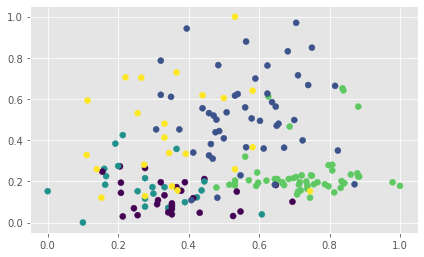

In [ ]:
kmeans.fit(data_set_normalized)
labels = kmeans.labels_

plot_clustering(data_set_normalized, labels)

plt.show()

####Base Não Normalizada

<Figure size 288x216 with 0 Axes>

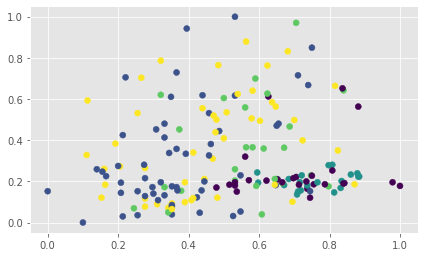

In [ ]:
kmeans.fit(data_set_not_normalized)
labels = kmeans.labels_

plot_clustering(data_set_not_normalized, labels)

plt.show()

####Silhueta

O método Silhueta se refere a um método de interpretação e verificação da consistência dos conjuntos de dados. Essa tecnologia fornece uma representação gráfica do grau em que cada objeto é classificado. O valor do contorno é uma medida de quão semelhante um objeto é ao seu próprio cluster em comparação com outros clusters.

O resultado foi analisado com as **bases normalizadas** e **não normalizadas** com **5 clusters**.

#####Base Normalizada

In [ ]:
clusterer = KMeans(n_clusters=5, random_state=10)
prediction = clusterer.fit_predict(data_set_normalized)

silhouette_avg = silhouette_score(data_set_normalized, prediction)
silhouette_avg

0.21869632088122407

#####Base Não Normalizada

In [ ]:
prediction = clusterer.fit_predict(data_set_not_normalized)

silhouette_avg = silhouette_score(data_set_not_normalized, prediction)
silhouette_avg

0.5489993239795681

###**Hierárquico:**

O método de agrupamento hierárquico é um algoritmo de agrupamento de agrupamento hierárquico. Inicie o processo de armazenamento em cluster interpretando cada nó como um cluster separado. Então, em cada etapa do algoritmo, os clusters com menor distância entre si são combinados em pares, reduzindo cada vez mais o número de clusters. Além disso, o modelo hierárquico tbm tem a presença dos dendogramas que é um diagrama de árvore que exibe os grupos formados por agrupamento de observações em cada passo e em seus níveis de similaridade. O nível de similaridade é medido ao longo do eixo vertical (alternativamente, você pode exibir o nível de distância) e as diferentes observações são listadas ao longo do eixo horizontal. 

####Dendograma com Base Normalizada

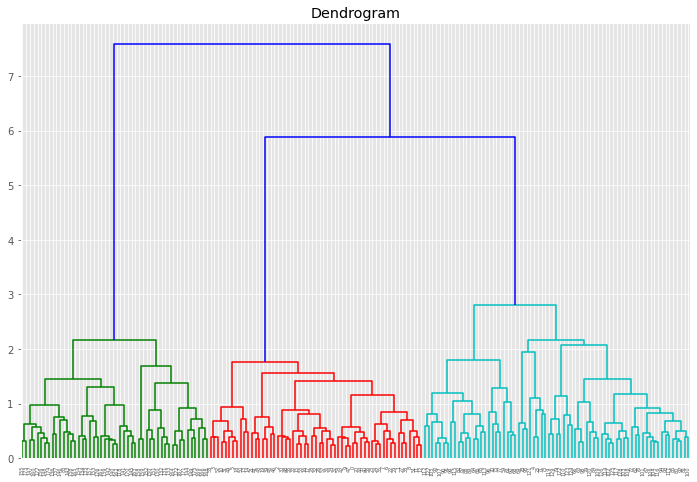

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Dendrogram")
Dendogram = shc.dendrogram(shc.linkage(data_set_normalized, method='ward'))

In [ ]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
prediction = cluster.fit_predict(data_set_normalized)

####Sihueta

#####Base Normalizada

0.20415379209163975

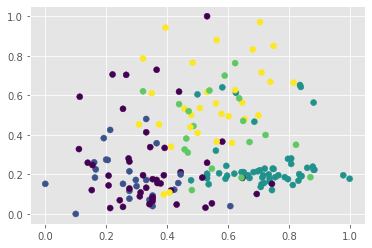

In [ ]:
silhouette_avg = silhouette_score(data_set_normalized, prediction)

plt.figure(figsize=(6, 4))
plt.scatter(data_set_normalized[:,0], data_set_normalized[:,1], c=cluster.labels_)

silhouette_avg



#####Base Não Normalizada

0.04167676895193962

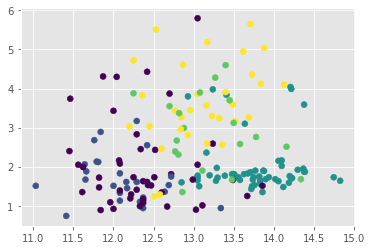

In [ ]:
silhouette_avg = silhouette_score(data_set_not_normalized, prediction)

plt.figure(figsize=(6, 4))
plt.scatter(data_set_not_normalized[:,0], data_set_not_normalized[:,1], c=cluster.labels_)

silhouette_avg

O modelo Hierárquico obteve um melhor resultado ao final do processo, tendo valores de agrupamentos dos clusters melhor do que no modelo K-means.